# **Analise Exploratoria dos Dados**

In [4]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [5]:
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
dataset.shape

(999, 12)

In [7]:
#nome as colunas
dataset.columns = ["ID", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [8]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
#agrupando dados categoricos
agrupado = dataset.groupby(["Estado"]).size()
agrupado

,0
Estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


<Axes: xlabel='Estado'>

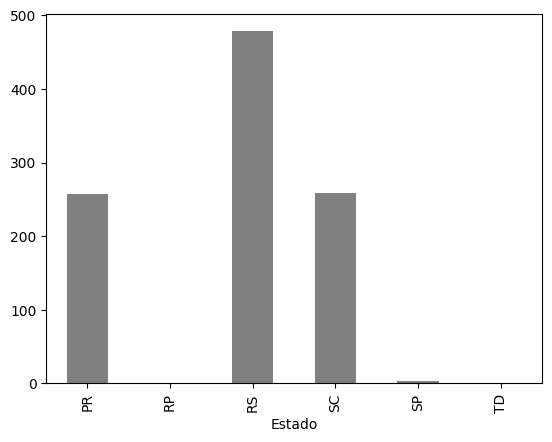

In [10]:
agrupado.plot.bar(color='gray')

In [11]:
agrupado = dataset.groupby(["Genero"]).size()
agrupado

,0
Genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


In [12]:
dataset['Score'].describe()

,Score
count,999.000000
mean,648.621622
std,98.264219
min,376.000000
25%,580.000000
50%,653.000000
75%,721.000000
max,850.000000


Text(0.5, 1.0, 'Score')

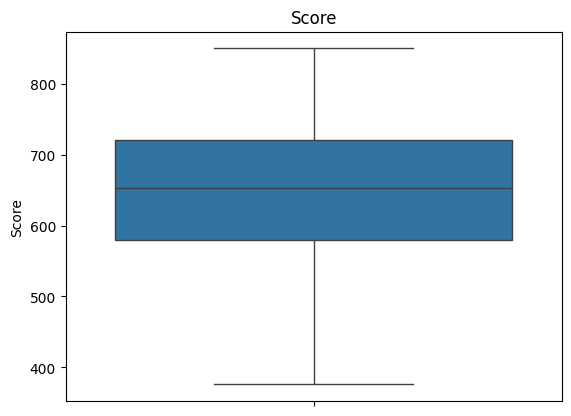

In [13]:
srn.boxplot(dataset['Score']).set_title('Score')

/tmp/ipython-input-4068248596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

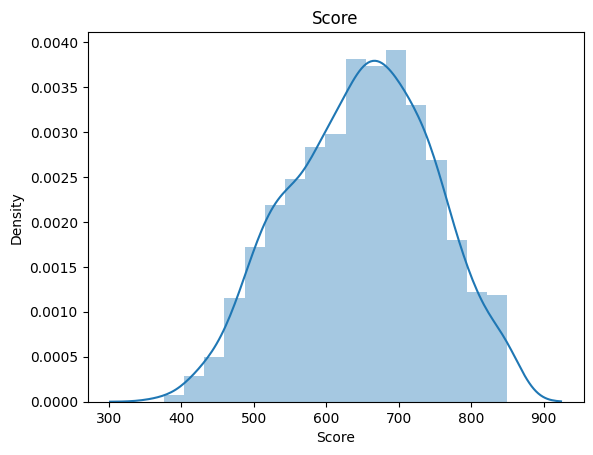

In [14]:
srn.distplot(dataset['Score']).set_title('Score')

In [15]:
dataset['Idade'].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


Text(0.5, 1.0, 'Idade')

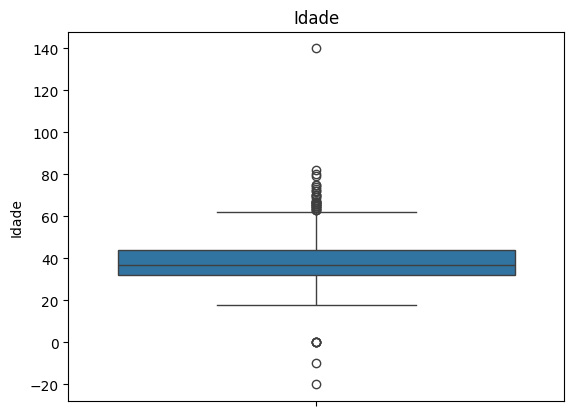

In [16]:
srn.boxplot(dataset['Idade']).set_title('Idade')

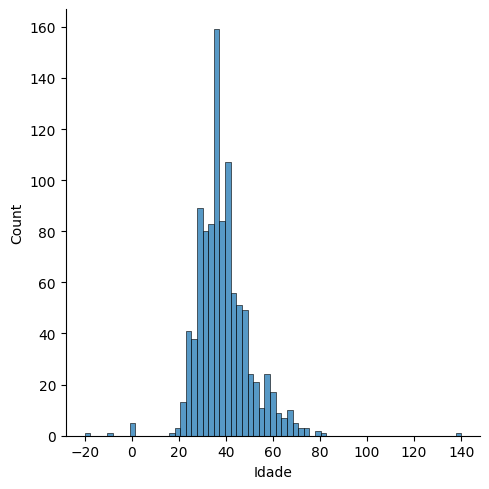

In [18]:
srn.displot(dataset['Idade'])

In [19]:
dataset['Salario'].describe()

,Salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


Text(0.5, 1.0, 'Salario')

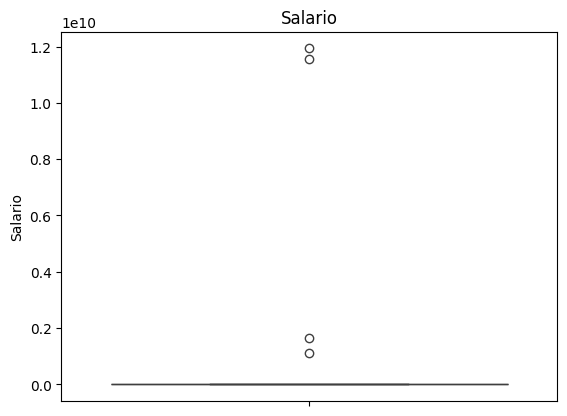

In [20]:
srn.boxplot(dataset['Salario']).set_title('Salario')

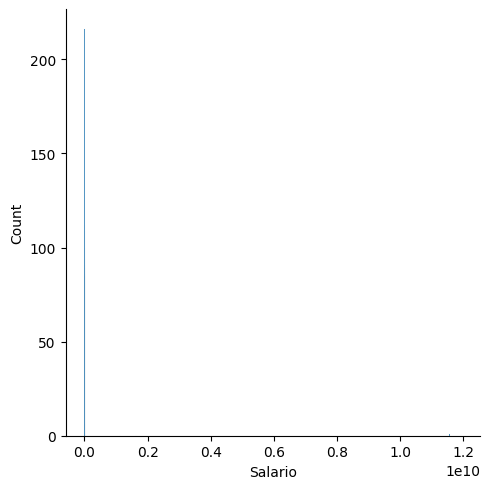

In [21]:
srn.displot(dataset['Salario'])

In [24]:
#contando valores nulos
dataset.isnull().sum()

,0
ID,0
Score,0
Estado,0
Genero,8
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


In [25]:
dataset['Salario'].describe()

,Salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


# Tratamento dos Dados

**Salario**

In [26]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [27]:
#substituindo NAS em salario pela mediana
dataset['Salario'].fillna(mediana, inplace=True)

/tmp/ipython-input-1830053363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Salario'].fillna(mediana, inplace=True)


In [28]:
dataset['Salario'].isnull().sum()

np.int64(0)

**Generos**

In [29]:
#Falta de padronização e nas em genero
agrupado = dataset.groupby(["Genero"]).size()
agrupado

,0
Genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


In [30]:
#total de nas
dataset['Genero'].isnull().sum()

np.int64(8)

In [31]:
#preenche NAs com masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)
dataset['Genero'].isnull().sum()

/tmp/ipython-input-206733026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Genero'].fillna('Masculino', inplace=True)


np.int64(0)

In [32]:
#padronizando
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['F','Fem']), 'Genero'] = "Feminino"

agrupado = dataset.groupby(['Genero']).size()
agrupado

,0
Genero,
Feminino,464
Masculino,535


**Idades**

In [33]:
#idades fora do dominio
dataset['Idade'].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


In [35]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [36]:
mediana = sts.median(dataset['Idade'])
mediana

37

In [37]:
#substituindo
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana

In [39]:
#verificando se ainda tem
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


**duplicados**

In [46]:
#dados duplicados
dataset[dataset.duplicated(keep=False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [48]:
#excluindo duplicados
dataset.drop_duplicates(subset='ID', keep='first', inplace=True)
dataset[dataset.duplicated(keep=False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


**Estados**

In [49]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

,0
Estado,
PR,257
RP,1
RS,474
SC,258
SP,4
TD,1


In [50]:
#atribuindo RS (moda)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD'])] = "RS"
agrupado = dataset.groupby(['Estado']).size()
agrupado

/tmp/ipython-input-3468670533.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RS' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD'])] = "RS"
/tmp/ipython-input-3468670533.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RS' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD'])] = "RS"
/tmp/ipython-input-3468670533.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RS' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD'])] = "RS"
/tmp/ipython-input-3468670533.py:2: F

,0
Estado,
PR,257
RS,480
SC,258


In [54]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
